In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 3)
from utils import *

In [2]:
DIR = "data/round-3/"

In [3]:
price = pd.read_csv(DIR+"price_history.csv", sep=";")

In [4]:
TIME = price["timestamp"].unique()

In [13]:
KELP = price.loc[price["product"]=="KELP"].reset_index(drop=True)
SQUID = price.loc[price["product"]=="SQUID_INK"].reset_index(drop=True)
CROSS = price.loc[price["product"]=="CROISSANTS"].reset_index(drop=True)
JAM = price.loc[price["product"]=="JAMS"].reset_index(drop=True)
DJ = price.loc[price["product"]=="DJEMBES"].reset_index(drop=True)
PB1 = price.loc[price["product"]=="PICNIC_BASKET1"].reset_index(drop=True)
PB2 = price.loc[price["product"]=="PICNIC_BASKET2"].reset_index(drop=True)
SPREAD1 = PB1["mid_price"].array - (6 * CROSS["mid_price"].array + 3 * JAM["mid_price"].array + DJ["mid_price"].array)
SPREAD2 = PB2["mid_price"].array - (4 * CROSS["mid_price"].array + 2 * JAM["mid_price"].array)

VR = price.loc[price["product"]=="VOLCANIC_ROCK"].reset_index(drop=True)
VC10500 = price.loc[price["product"]=="VOLCANIC_ROCK_VOUCHER_10500"].reset_index(drop=True)
VC10250 = price.loc[price["product"]=="VOLCANIC_ROCK_VOUCHER_10250"].reset_index(drop=True)
VC10000 = price.loc[price["product"]=="VOLCANIC_ROCK_VOUCHER_10000"].reset_index(drop=True)
VC9750 = price.loc[price["product"]=="VOLCANIC_ROCK_VOUCHER_9750"].reset_index(drop=True)
VC9500 = price.loc[price["product"]=="VOLCANIC_ROCK_VOUCHER_9500"].reset_index(drop=True)


<Figure size 1000x300 with 0 Axes>

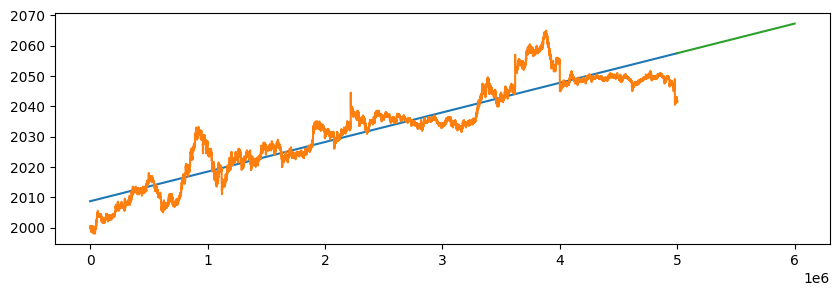

In [16]:
plt.figure(figsize=(10,3))
y = KELP["mid_price"].array
X = np.arange(0, 100 * len(y), 100)

A = np.vstack([X, np.ones(len(y))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
sigma = np.std(y)

plt.figure(figsize=(10,3))
plt.plot(X, m * X + c)
plt.plot(X, y)

c0 = m * (X[-1]+100) + c
plt.plot(range(int(5e6), int(6e6), 100), m * TIME + c0)


In [18]:
m, c0, sigma

(np.float64(9.768257499187243e-06),
 np.float64(2057.517022160843),
 np.float64(15.11018100844262))

In [6]:
swmp_implied1 = []
for (_, row1), (_, row2), (_, row3), (_, row4) in zip(CROSS.iterrows(), JAM.iterrows(), DJ.iterrows(), PB1.iterrows()):

    implied_bid = 6 * row1["bid_price_1"] + 3 * row2["bid_price_1"] + row3["bid_price_1"]
    implied_ask = 6 * row1["ask_price_1"] + 3 * row2["ask_price_1"] + row3["ask_price_1"]
    implied_ask_vol = min([row1["ask_volume_1"] // 6, row2["ask_volume_1"] // 3, row3["ask_volume_1"]])
    implied_bid_vol = min([row1["bid_volume_1"] // 6, row2["bid_volume_1"] // 3, row3["bid_volume_1"]])

    basket_bid = row4["bid_price_1"]
    basket_ask = row4["ask_price_1"]
    basket_ask_vol = row4["ask_volume_1"]
    basket_bid_vol = row4["bid_volume_1"]

    swmp_implied1.append((basket_bid * basket_ask_vol + basket_ask * basket_bid_vol) / (basket_bid_vol + basket_ask_vol) -
                          (implied_bid * implied_ask_vol + implied_ask * implied_bid_vol) / (implied_bid_vol + implied_ask_vol))



In [7]:
swmp_implied2 = []
for (_, row1), (_, row2), (_, row3) in zip(CROSS.iterrows(), JAM.iterrows(), PB2.iterrows()):

    implied_bid = 4 * row1["bid_price_1"] + 2 * row2["bid_price_1"] 
    implied_ask = 4 * row1["ask_price_1"] + 2 * row2["ask_price_1"]
    implied_ask_vol = min([row1["ask_volume_1"] // 4, row2["ask_volume_1"] // 2])
    implied_bid_vol = min([row1["bid_volume_1"] // 4, row2["bid_volume_1"] // 2])

    basket_bid = row4["bid_price_1"]
    basket_ask = row4["ask_price_1"]
    basket_ask_vol = row4["ask_volume_1"]
    basket_bid_vol = row4["bid_volume_1"]

    swmp_implied2.append((basket_bid * basket_ask_vol + basket_ask * basket_bid_vol) / (basket_bid_vol + basket_ask_vol) -
                          (implied_bid * implied_ask_vol + implied_ask * implied_bid_vol) / (implied_bid_vol + implied_ask_vol))


### Final results Round 2

In [48]:
infile = DIR+"round2_final.log"
hist = get_tradehistory(infile)

In [ ]:
# # get price data

# fp = open(infile)
# start = False
# start_signal = "Activities log"
# end_signal = "Trade History"
# outfile = DIR+"round2.txt"

# with open(outfile, "w") as f:

#     for line in fp:

#         if not start:
#             if start_signal in line:
#                 start = True

#         elif start:
#             if end_signal in line:
#                 break
            
#             f.write(line)
             
# f.close()
# fp.close()



In [30]:
pnl = pd.read_csv(DIR+"round2.txt", sep=";")

#### SQUID

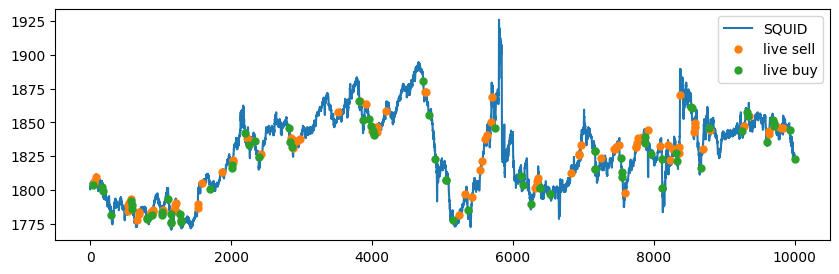

In [80]:
prod_hist = get_mytrades(hist, "SQUID_INK")
buy = prod_hist.loc[prod_hist["buyer"]=="SUBMISSION"]
sell = prod_hist.loc[prod_hist["seller"]=="SUBMISSION"]
buy_time = buy["timestamp"].array / 100
sell_time = sell["timestamp"].array / 100
buy_price = SQUID["mid_price"].array[40000-1+buy_time.astype(int)]
sell_price = SQUID["mid_price"].array[40000-1+sell_time.astype(int)]

plt.plot(TIME/100, SQUID["mid_price"].array[-10000:], label="SQUID")
plt.plot(sell_time, sell_price, lw=0, ms=10, marker='.', label="live sell")
plt.plot(buy_time, buy_price, lw=0, ms=10, marker='.', label="live buy")
plt.legend()

<Axes: >

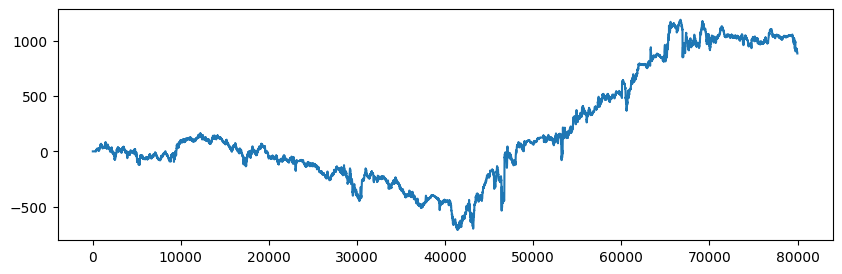

In [ ]:
plt.figure(figsize=(10,3))
pnl.loc[pnl["product"]=="SQUID_INK"]["profit_and_loss"].plot()

#### BASKETS

In [53]:
pb1_pnl = pnl.loc[pnl["product"]=="PICNIC_BASKET1"]["profit_and_loss"].array
pb2_pnl = pnl.loc[pnl["product"]=="PICNIC_BASKET2"]["profit_and_loss"].array
cross_pnl = pnl.loc[pnl["product"]=="CROISSANTS"]["profit_and_loss"].array
dj_pnl = pnl.loc[pnl["product"]=="DJEMBES"]["profit_and_loss"].array
jam_pnl = pnl.loc[pnl["product"]=="JAMS"]["profit_and_loss"].array

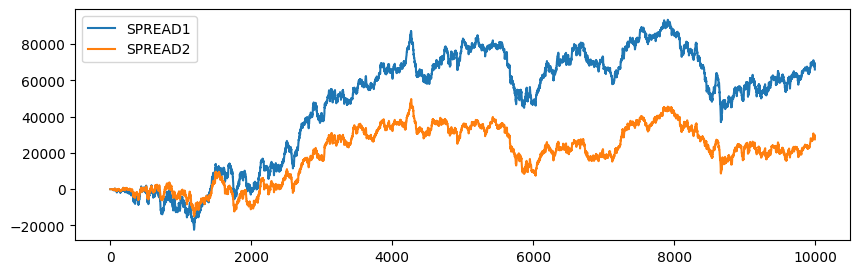

In [61]:
plt.plot(pb1_pnl + (6 * cross_pnl + 3 * jam_pnl + dj_pnl), label="SPREAD1")
plt.plot(pb2_pnl + (4 * cross_pnl + 2 * jam_pnl), label="SPREAD2")
plt.legend()

I was blocked by the lack of croissants...

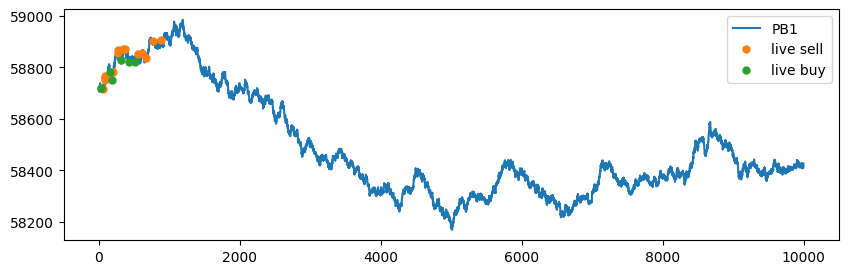

In [26]:
prod_hist = get_mytrades(hist, "PICNIC_BASKET1")
buy = prod_hist.loc[prod_hist["buyer"]=="SUBMISSION"]
sell = prod_hist.loc[prod_hist["seller"]=="SUBMISSION"]
buy_time = buy["timestamp"].array / 100
sell_time = sell["timestamp"].array / 100
buy_price = PB1["mid_price"].array[30000+buy_time.astype(int)]
sell_price = PB1["mid_price"].array[30000+sell_time.astype(int)]

plt.figure(figsize=(10,3))
plt.plot(TIME/100, PB1["mid_price"].array[30000:], label="PB1")
plt.plot(sell_time, sell_price, lw=0, ms=10, marker='.', label="live sell")
plt.plot(buy_time, buy_price, lw=0, ms=10, marker='.', label="live buy")
plt.legend()

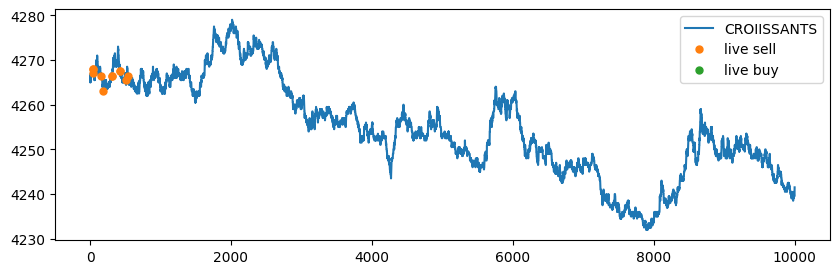

In [25]:
prod_hist = get_mytrades(hist, "CROISSANTS")
buy = prod_hist.loc[prod_hist["buyer"]=="SUBMISSION"]
sell = prod_hist.loc[prod_hist["seller"]=="SUBMISSION"]
buy_time = buy["timestamp"].array / 100
sell_time = sell["timestamp"].array / 100
buy_price = CROSS["mid_price"].array[30000+buy_time.astype(int)]
sell_price = CROSS["mid_price"].array[30000+sell_time.astype(int)]

plt.figure(figsize=(10,3))
plt.plot(TIME/100, CROSS["mid_price"].array[30000:], label="CROIISSANTS")
plt.plot(sell_time, sell_price, lw=0, ms=10, marker='.', label="live sell")
plt.plot(buy_time, buy_price, lw=0, ms=10, marker='.', label="live buy")
plt.legend()

#### Investigate signals and strategies for different products

#### SQUID

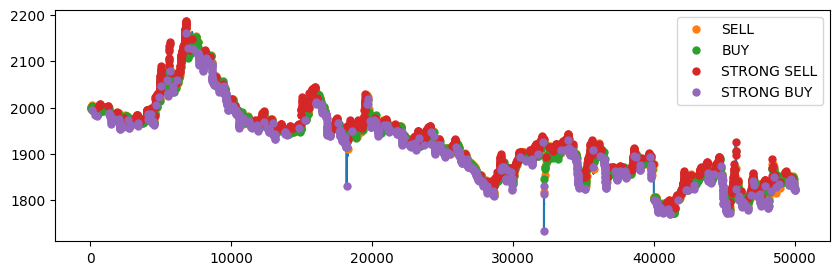

In [27]:
sells, buys, strongsells, strongbuys = find_signal_breakout(SQUID["mid_price"].array, lookback=10, lookback_strong=500, hits=1, strong_hits=10)

plt.plot(SQUID["mid_price"].array)
plt.plot(sells, SQUID["mid_price"].array[sells], lw=0, ms=10, marker=".", label="SELL")
plt.plot(buys, SQUID["mid_price"].array[buys], lw=0, ms=10, marker=".", label="BUY")
plt.plot(strongsells, SQUID["mid_price"].array[strongsells], lw=0, ms=10, marker=".", label="STRONG SELL")
plt.plot(strongbuys, SQUID["mid_price"].array[strongbuys], lw=0, ms=10, marker=".", label="STRONG BUY")
plt.legend()

# plt.xlim((40000, 41000))
# plt.ylim((1750, 1820))

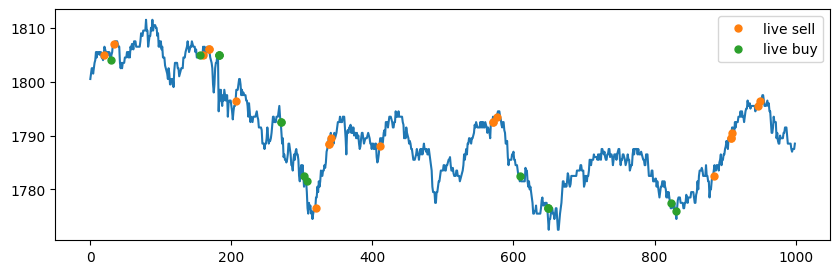

In [10]:
infile = DIR+"current.log"
hist = get_tradehistory(infile)
prod_hist = get_mytrades(hist, "SQUID_INK")
buy = prod_hist.loc[prod_hist["buyer"]=="SUBMISSION"]
sell = prod_hist.loc[prod_hist["seller"]=="SUBMISSION"]
buy_time = buy["timestamp"].array / 100
sell_time = sell["timestamp"].array / 100
buy_price = SQUID["mid_price"].array[40000-1+buy_time.astype(int)]
sell_price = SQUID["mid_price"].array[40000-1+sell_time.astype(int)]

plt.plot(TIME[:1000]/100, SQUID["mid_price"].array[-10000:-9000])
plt.plot(sell_time, sell_price, lw=0, ms=10, marker='.', label="live sell")
plt.plot(buy_time, buy_price, lw=0, ms=10, marker='.', label="live buy")
plt.legend()

#### SPREAD 1

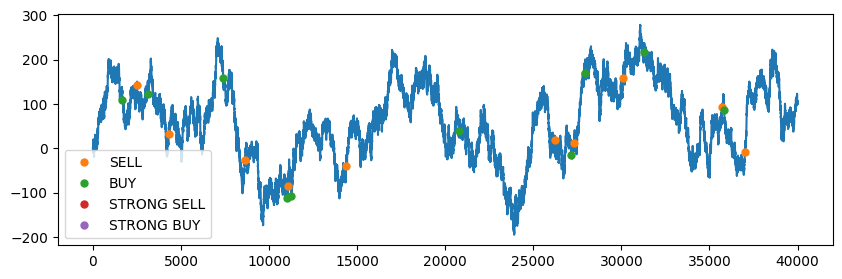

In [6]:
sells, buys, strongsells, strongbuys = find_signal_zscore(SPREAD1, window=20, mult=2.5, mult_strong=10, hits=3, strong_hits=10)

plt.plot(SPREAD1)
plt.plot(sells, SPREAD1[sells], lw=0, ms=10, marker=".", label="SELL")
plt.plot(buys, SPREAD1[buys], lw=0, ms=10, marker=".", label="BUY")
plt.plot(strongsells, SPREAD1[strongsells], lw=0, ms=10, marker=".", label="STRONG SELL")
plt.plot(strongbuys, SPREAD1[strongbuys], lw=0, ms=10, marker=".", label="STRONG BUY")
plt.legend()

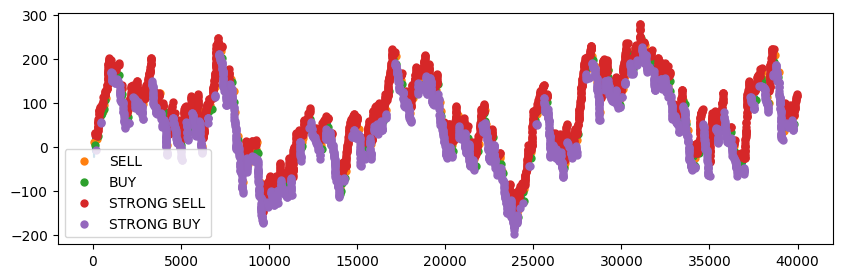

In [ ]:
SPREAD1 = np.array(swmp_implied1)
sells, buys, strongsells, strongbuys = find_signal_breakout(SPREAD1, lookback=20, lookback_strong=100, hits=2, strong_hits=10)

plt.plot(SPREAD1)
plt.plot(sells, SPREAD1[sells], lw=0, ms=10, marker=".", label="SELL")
plt.plot(buys, SPREAD1[buys], lw=0, ms=10, marker=".", label="BUY")
plt.plot(strongsells, SPREAD1[strongsells], lw=0, ms=10, marker=".", label="STRONG SELL")
plt.plot(strongbuys, SPREAD1[strongbuys], lw=0, ms=10, marker=".", label="STRONG BUY")
plt.legend()
plt.xlim((30000,31000))
plt.ylim((80,280))

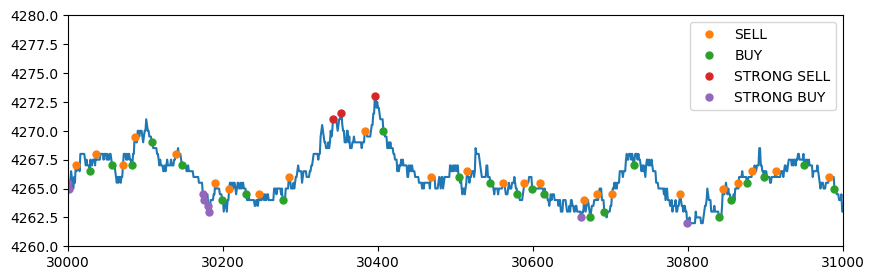

In [23]:
sells, buys, strongsells, strongbuys = find_signal_breakout(CROSS["mid_price"].array, lookback=10, 
                                                            lookback_strong=500, hits=1, strong_hits=10)

plt.plot(CROSS["mid_price"].array)
plt.plot(sells, CROSS["mid_price"].array[sells], lw=0, ms=10, marker=".", label="SELL")
plt.plot(buys, CROSS["mid_price"].array[buys], lw=0, ms=10, marker=".", label="BUY")
plt.plot(strongsells, CROSS["mid_price"].array[strongsells], lw=0, ms=10, marker=".", label="STRONG SELL")
plt.plot(strongbuys, CROSS["mid_price"].array[strongbuys], lw=0, ms=10, marker=".", label="STRONG BUY")
plt.ylim((4260, 4280))
plt.xlim((30000,31000))
plt.legend()

In [28]:
backtest = pd.read_csv(DIR+"backtest.csv", sep=";")
CROSS = backtest.loc[backtest["product"]=="CROISSANTS"].reset_index(drop=True)
JAM = backtest.loc[backtest["product"]=="JAMS"].reset_index(drop=True)
DJ = backtest.loc[backtest["product"]=="DJEMBES"].reset_index(drop=True)
PB1 = backtest.loc[backtest["product"]=="PICNIC_BASKET1"].reset_index(drop=True)
PB2 = backtest.loc[backtest["product"]=="PICNIC_BASKET2"].reset_index(drop=True)
swmp_implied1 = []

for (_, row1), (_, row2), (_, row3), (_, row4) in zip(CROSS.iterrows(), JAM.iterrows(), DJ.iterrows(), PB1.iterrows()):
    implied_bid = 6 * row1["bid_price_1"] + 3 * row2["bid_price_1"] + row3["bid_price_1"]
    implied_ask = 6 * row1["ask_price_1"] + 3 * row2["ask_price_1"] + row3["ask_price_1"]
    implied_ask_vol = min([row1["ask_volume_1"] // 6, row2["ask_volume_1"] // 3, row3["ask_volume_1"]])
    implied_bid_vol = min([row1["bid_volume_1"] // 6, row2["bid_volume_1"] // 3, row3["bid_volume_1"]])

    basket_bid = row4["bid_price_1"]
    basket_ask = row4["ask_price_1"]
    basket_ask_vol = row4["ask_volume_1"]
    basket_bid_vol = row4["bid_volume_1"]

    swmp_implied1.append((basket_bid * basket_ask_vol + basket_ask * basket_bid_vol) / (basket_bid_vol + basket_ask_vol) -
                          (implied_bid * implied_ask_vol + implied_ask * implied_bid_vol) / (implied_bid_vol + implied_ask_vol))

swmp_implied2 = []
for (_, row1), (_, row2), (_, row3) in zip(CROSS.iterrows(), JAM.iterrows(), PB2.iterrows()):

    implied_bid = 4 * row1["bid_price_1"] + 2 * row2["bid_price_1"] 
    implied_ask = 4 * row1["ask_price_1"] + 2 * row2["ask_price_1"]
    implied_ask_vol = min([row1["ask_volume_1"] // 4, row2["ask_volume_1"] // 2])
    implied_bid_vol = min([row1["bid_volume_1"] // 4, row2["bid_volume_1"] // 2])

    basket_bid = row4["bid_price_1"]
    basket_ask = row4["ask_price_1"]
    basket_ask_vol = row4["ask_volume_1"]
    basket_bid_vol = row4["bid_volume_1"]

    swmp_implied2.append((basket_bid * basket_ask_vol + basket_ask * basket_bid_vol) / (basket_bid_vol + basket_ask_vol) -
                          (implied_bid * implied_ask_vol + implied_ask * implied_bid_vol) / (implied_bid_vol + implied_ask_vol))




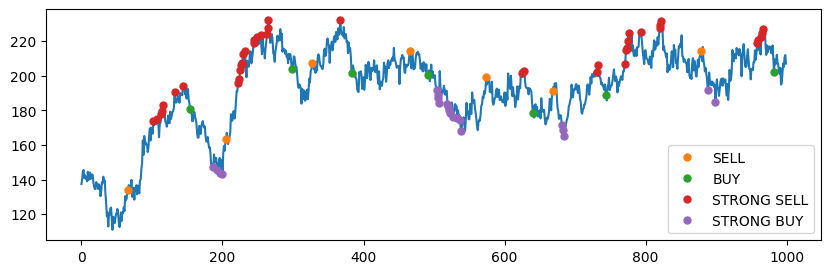

In [31]:
SPREAD1 = np.array(swmp_implied1)
sells, buys, strongsells, strongbuys = find_signal_breakout(SPREAD1, lookback=20, lookback_strong=100, hits=2, strong_hits=10)

plt.plot(SPREAD1)
plt.plot(sells, SPREAD1[sells], lw=0, ms=10, marker=".", label="SELL")
plt.plot(buys, SPREAD1[buys], lw=0, ms=10, marker=".", label="BUY")
plt.plot(strongsells, SPREAD1[strongsells], lw=0, ms=10, marker=".", label="STRONG SELL")
plt.plot(strongbuys, SPREAD1[strongbuys], lw=0, ms=10, marker=".", label="STRONG BUY")
plt.legend()

In [32]:
swmp_implied1

[137.42857142857247,
 140.03333333333285,
 144.5,
 145.5,
 140.90740740740875,
 142.5,
 140.5,
 141.15517241378984,
 138.95454545454413,
 144.4736842105267,
 139.71805273833888,
 140.34999999999854,
 144.04761904761835,
 140.2741935483864,
 141.20270270269975,
 143.0,
 142.5,
 138.0142857142855,
 135.83333333333576,
 134.5,
 134.5,
 138.5,
 136.5,
 137.35714285714494,
 134.5,
 137.125,
 135.5,
 130.36956521739194,
 133.0,
 138.3611111111095,
 137.83333333333576,
 141.63043478260806,
 139.0,
 139.5,
 131.90740740740875,
 126.64285714285506,
 119.0,
 120.99056603773352,
 112.84482758621016,
 119.5,
 119.5,
 123.44642857142753,
 123.7790697674427,
 117.33333333333576,
 110.94242424242111,
 118.5,
 117.72222222221899,
 114.73913043478387,
 117.39912280702265,
 120.0,
 120.5,
 123.0,
 120.5,
 115.0,
 112.5,
 115.40000000000146,
 120.93935926773702,
 116.04545454545587,
 121.0737704918065,
 120.69354838709842,
 123.83838383838156,
 121.66666666666424,
 130.3482142857174,
 128.0,
 128.7666666